# Tarea 1. Inteligencia Artificial
## Alan García Zermeño
## CIMAT, 25/01/2023

### **1. Leer los nombres de los archivos en un directorio y construir un Diccionario de Python de la forma {key : value} tal que la llave (key) sea un entero y el valor (value) el nombre del archivo (sin camino, path) incluyendo su extensión.**

Podemos hacer uso de la librería _glob_ para acceder fácilmente a los archivos del sistema y guardar todos los títulos de los archivos de nuestro directorio _carpeta_ en nuestro diccionario _dict_.
_setdefault()_ permite anexar un elemento nuevo al diccionario ya definido previamente y la función _replace()_ nos permite eliminar el resto de la cadena de texto que no nos interesa guardar, en este caso: _./carpeta/_


In [ ]:
import glob
dict = {}

for k,archivo in enumerate(glob.glob("./carpeta/*")):
    dict.setdefault(k+1,archivo.replace("./carpeta/",""))

print(dict)

{1: 'texto.txt', 2: 'file.yaml', 3: 'flameTornado.png', 4: 'huracan.jpg'}


### **2. Invierta un diccionario que originalmente tienen la forma {x : y} a {y : x}. Use “list comprehension” para generar el nuevo diccionario.**

Usaremos el diccionario _dict_ ya creado para crear nuestro _dict2_.
Para usar _list comprehension_ al crear nuestro nuevo diccionario, usamos la función _items()_ que nos provee los elementos de un diccionario en forma de lista. Así, iteramos en esa lista llenando nuestro nuevo diccionario con los elementos invertidos.

In [ ]:
dict2 = {x:y for (y,x) in dict.items()}
print(dict2)

{'texto.txt': 1, 'file.yaml': 2, 'flameTornado.png': 3, 'huracan.jpg': 4}


### **3. Escribe una función que determine si una palabra es un palindromo o no. Considere que la primera letra puede estar en mayúscula o en minúscula. Es decir Ada es un palindromo**

Para no diferenciar entre mayúsculas y minúsculas usamos la función _lower()_, que nos permite transformar toda la cadena a minúsculas, después hacemos la comparación lógica entre la cadena y la cadena invertida _word == word[::-1]_. También eliminamos espacios con la función _replace()_. La función palíndromo devuelve _True_ si el argumento es palíndromo y _False_ si no lo es.

In [ ]:
def palindromo(word):
    if type(word) != str: 
        print("ERROR\nLa función palíndromo solo admite cadenas de texto")
        return(-1)
    
    word = word.lower().replace(" ","")
    if word == word[::-1]: return(True)
    else: return(False)

palindromo("Anita Lava La Tina")

True

### **4. Escriba una función que calcule el número de días entre dos fechas escritas en una cadena (string) con el formato “dd/mm/aaaa”**

Usamos la función _date()_ de la libería _datetime_ para darle formato de fecha a las cadenas dadas a nuestra función creada _DateDistance()_, y así poder calcular el número de días entre ambas fechas haciendo una resta y accediendo directamente a la información que nos interesa con _.days_.

In [1]:
from datetime import date

def DateDistance(Date1,Date2):
    if len(Date1) != 10 or len(Date2) != 10:
        print("ERROR\nAmbas fechas deben tener formato de texto dd/mm/aaaa\nEjemplo: 12/06/1832")
        return(-1)
    Date1 = date(int(Date1[6:]),int(Date1[3:5]),int(Date1[:2]))
    Date2 = date(int(Date2[6:]),int(Date2[3:5]),int(Date2[:2]))
    print(abs(Date1-Date2).days)

DateDistance("17/05/1623","24/01/2023")

145984


### **5. Escriba una función que calcule la transpuesta de un arreglo bidimensional (NxN) de elementos que pueden ser números o cadenas. Haga las operaciones en el mismo arreglo, es decir no use un arreglo auxiliar.**

Hacemos las operaciones debidas dentro del mismo arreglo _array_ y devolvemos el arreglo transpuesto. El uso de la librería _sympy_ es únicamente para imprimir las matrices.

In [22]:
from sympy import Matrix

def transpuesta(array):
    for i in range(len(array)):
        for j in range(i):
            if(i!=j):
                t = array[j][i]
                array[j][i] = array[i][j]
                array[i][j] = t
    return(array)

ar = [["a",78,"c"],["d","e",21],["g","h","i"]]
Matrix(ar)

Matrix([
[a, 78,  c],
[d,  e, 21],
[g,  h,  i]])

In [23]:
art = transpuesta(ar)
Matrix(art)

Matrix([
[ a,  d, g],
[78,  e, h],
[ c, 21, i]])

### **6. Escriba una función _CalculaRaiz()_ que calcula una raiz real de una función $f: \mathbb{R} \rightarrow \mathbb{R}$ usando el método de Newton-Raphson. La función recibe como argumento la función $f$ y un punto inicial. La función debe verificar que la secuencia de puntos generados tiene pendiente $m$ con $|m| < 1$.**


Para usar el algoritmo Newton-Raphson tendremos que evaluar iterativamente $x$ en:
## $x_{i+1} = x_i - \frac{f(x_i)}{df(x_i)}$
Donde $f(x)$ es nuestra función evaluada en $x$, mientras que $df(x)$ es la derivada de nuestra función evaluada en $x$ calculada con diferencias finitas como:
## $df(x) = \lim \limits_{x \rightarrow 0} \frac{f(x+h)-f(x)}{h}$
$x_0$ será el punto inicial donde iniciaremos al algoritmo y la tolerancia será el número que permitirá al algoritmo parar cuando:
## $|f(x_i)-f(x_{i+1})|< tol$

In [ ]:
def func(x): return(x*x/2 - 3*x - 1)
def dfunc(x):
    h = 0.1
    return((func(x+h)-func(x))/h) #Diferencias finitas

def newton(p0,tol):
    for i in range(1,30):
        dfx = dfunc(p0)1
        if(abs(dfx)<1): print("Pendiente:",dfx)
        p = p0 - func(p0)/dfx
        #print(p)\rule{3}{1}
        if(abs(p-p0)<tol):
            print("Raiz encontrada con ",i,"iteraciones:")
            break
        p0=p
    return(p)

newton(2,1e-7) #(x0 , Tolerancia)

Pendiente: -0.9500000000000064
Raiz encontrada con  7 iteraciones:


-0.3166247917120943

### **7. Escriba una función que convierta un número decimal en binario y otra que convierta un número binario en decimal**

Para transformar un número decimal a binario, aplicamos la operación módulo 2 al número decimal para saber el primer dígito del código binairo, después iterativamente dividimos entre 2 el número y volvemos a aplicar la operación módulo. El resultado de los módulos dan la cadena de 1 y 0 que al revés nos darán el número binario.
Mientras que para regresar a decimal, solo multiplicamos por 2 un 1 por cada dígito del número binario y como extra le vamos sumando 1 por cada dígito 1 en el binario.

La función binaria acepta flotantes pero está redondeada a 8 decimales, por lo que normalmente está sujeto a algo de pérdida.

In [ ]:
def binario(m):
    if(m == 0): return('0')
    if(m < 0): return(-1)
    if((m-int(m))>0): 
        m = round(m*(2**8))
        flag = True
    ci = []
    while(m>1):
        t = m%2
        ci.append(str(t))
        m = m//2
    ci.append('1')
    if(flag == True): ci.insert(8,".")
    return(float("".join(ci[::-1])))

binario(10.38)

1010.01100001

In [ ]:
def decimal(m):
    if(m == 0): return(0)
    d = 1
    if((m-int(m))>0): 
        m = round(m*(10**8))
        flag = True
    m = list(str(m))
    for i in range(1,len(m)):
        if(m[i] == "1"): d = d*2 + 1
        else: d = d*2
    if(flag == True): d = d/2**8
    return(d)

decimal(1010.0110000101)

10.37890625

### **8. Escribir una función que lea un archivo de texto (parámetro) y escriba un archivo en formato YAML con cada palabra o token (mayúsculas se cambian por minúsculas) que aparece en el documento y su frecuencia de aparición. Token es una palabra o símbolo (&, ¿, etc.). El archivo aparecen los tokens de mayor frecuenca a menor frecuencia .**

Para este ejercicio leemos un archivo de texto con la función _open()_ y nuestra función recibe el texto y un caracter para usar de separador, cada que forma un token se guarda en el diccionario _tok_, revisando en cada paso si el token formado ya se encuentra en el diccionario. Al final usamos la librería _yaml_ para escribir en orden de frecuencias en un archivo de formato _yaml_ nuestro diccionario.
A modo de muestra, usamos como separador el caracter _espacio_.

In [ ]:
import yaml

def tokens(tex,sep):
    tex = tex.lower()
    tok = {}
    k = 0
    for i,a in enumerate(text):
        if(a == sep):
            t = tex[k:i]
            if(tok.get(t) == None): tok.setdefault(t,1)
            else: tok[t] += 1               
            k = i+1
    tok.setdefault(tex[k:i],1)
    tok = {k: v for k, v in sorted(tok.items(),
                    key=lambda x: x[1], reverse = True)}
    
    with open('./carpeta/file.yaml', 'w') as file:
        documents = yaml.dump(tok, file,sort_keys=False, 
                              allow_unicode=True)
    print("file.yaml ha sido creado con:\n")
    print(yaml.dump(tok, sort_keys=False, allow_unicode=True))
    

text = open('./carpeta/texto.txt').read()
tokens(text," ")

file.yaml ha sido creado con:

la: 2
una: 1
vez: 1
con: 1
luz: 1
apagada,: 1
las: 1
estrellas: 1
entran: 1
a: 1
través: 1
de: 1
ventana.: 1



### **9. Escriba una función que lee un archivo a partir de una dirección URL (por ejemplo https://www.researchgate.net/profile/Awni-Abu-Saman/publication/307138664/figure/fig1/AS:399976761970690@1472373299942/The-original-cameraman-image_Q640.jpg)**

### **Luego, despliege la imagen, calcule el histrograma de niveles de grises en n (parámetro) bins y la matriz de coocurencias de los n niveles de gris. Investigue lo qué es la matrix de coocurrencias.**

In [8]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from urllib import request
from PIL import Image

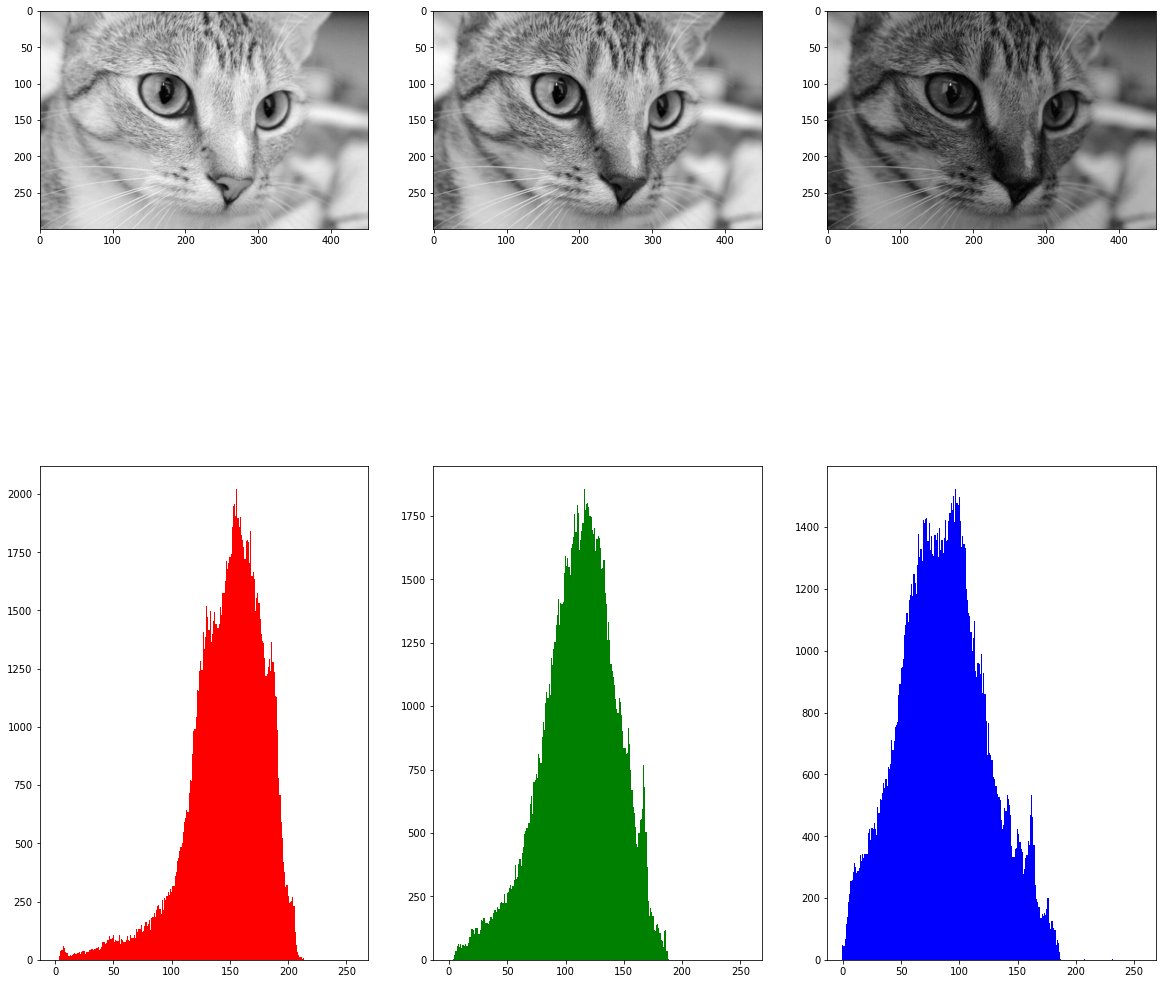

In [18]:
image = io.imread('https://raw.githubusercontent.com/scikit-image/scikit-image/v0.10.1/skimage/data/chelsea.png')

image_red, image_green, image_blue = image[:,:,0], image[:,:,1], image[:,:,2]

fig, ax = plt.subplots(2,3,figsize=(20,20))
ax[0,0].imshow(image_red, cmap='gray')
ax[0,1].imshow(image_green, cmap='gray')
ax[0,2].imshow(image_blue, cmap='gray')
 
bins = np.arange(-0.5, 255+1,1)
ax[1,0].hist(image_red.flatten(), bins = bins, color='r')
ax[1,1].hist(image_green.flatten(), bins=bins, color='g')
ax[1,2].hist(image_blue.flatten(), bins=bins, color='b')

plt.show()

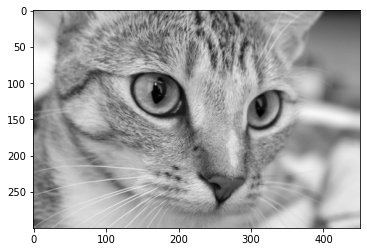

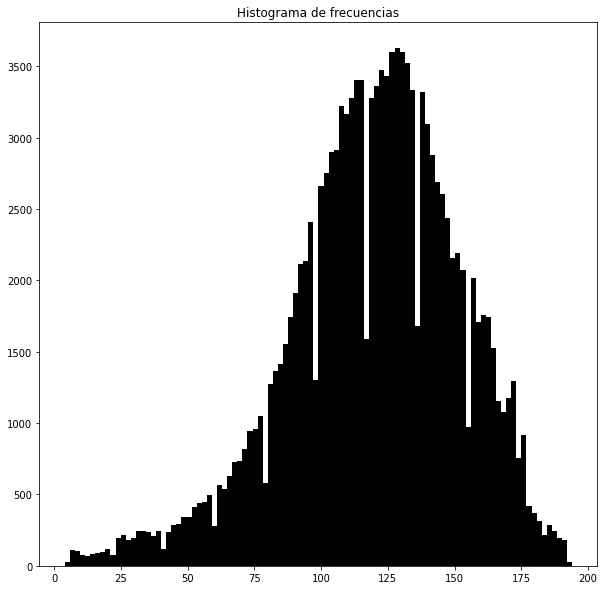

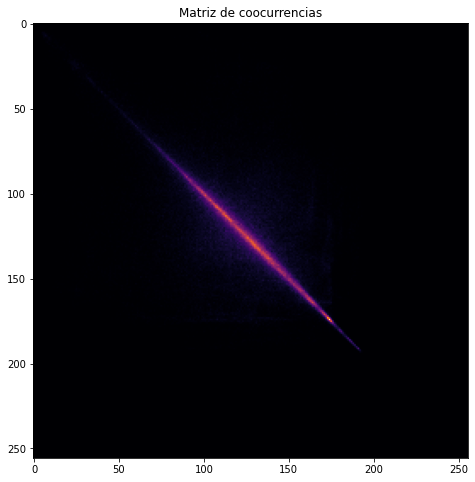

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
def imageAna(url):
    request.urlretrieve(url,'img.jpeg')
    img = Image.open('img.jpeg').convert('L')
    plt.imshow(img,cmap='gray')
    im_w, im_h = img.size
    pixels1d = list(img.getdata())
    pixels2d = np.array(pixels1d).reshape((im_w, im_h))
    plt.figure(figsize=(10,10))
    plt.hist(pixels1d,bins=100,color = 'black')
    plt.title('Histograma de frecuencias')
    mtx = np.zeros((256,256))
    for i in range(im_w-1):
        for j in range(im_h-1):
                mtx[pixels2d[i,j],pixels2d[i+1,j]] += 1
                mtx[pixels2d[i,j],pixels2d[i,j+1]] += 1 
    plt.figure(figsize=(8,8))
    plt.imshow(mtx,cmap='inferno')
    plt.title('Matriz de coocurrencias')
    plt.show()
    return mtx

url = 'https://raw.githubusercontent.com/scikit-image/scikit-image/v0.10.1/skimage/data/chelsea.png'
imageAna(url)